In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/46.1 kB ? eta -:--:--
     ---------------------------------------- 46.1/46.1 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.1 MB 2.5 MB/s eta 0:02:33
   ---------------------------------------- 0.3/377.1 MB 3.4 MB/s eta 0:01:51
   ---------------------------------------- 0.4/377.1 MB 3.2 MB/s eta 0:01:58
   ---------------------------------------- 0.7/377.1 MB 3.2 MB/s eta 0:01:59
   ---------------------------------------- 0.8/377.1 MB 3.3 MB/s eta 0:01:55
   ---------------------------------------- 1.1/377.1 MB 3.8 MB/s eta 0:01:38
   ---------------------------------------- 1.4/377.1 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 1.6/377.1 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 1.8/377.1 MB 4.1 MB/s eta 0:01:


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:


import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

K.clear_session()

n_classes = 101
img_width, img_height = 128, 128
train_data_dir = 'food-101/train'
validation_data_dir = 'food-101/test'
nb_train_samples = 75750
nb_validation_samples = 25250
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


mbv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape = (128,128,3))
x = mbv2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.2)(x)


predictions = Dense(101,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=mbv2.input, outputs=predictions)
opt = SGD(momentum=0.9, learning_rate=0.001)  # Set learning rate here
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class_sept.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history = model.fit(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=15,  
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained.keras')


2.16.1

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.
Epoch 1/15
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1902 - loss: 4.3819
Epoch 1: val_loss improved from inf to 3.78845, saving model to best_model_3class_sept.keras
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 2911s 1s/step - accuracy: 0.1902 - loss: 4.3816 - val_accuracy: 0.2732 - val_loss: 3.7885
Epoch 2/15
   1/2367 ━━━━━━━━━━━━━━━━━━━━ 44:53 1s/step - accuracy: 0.4688 - loss: 2.6054
Epoch 2: val_loss improved from 3.78845 to 2.87182, saving model to best_model_3class_sept.keras
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 2s 274us/step - accuracy: 0.4688 - loss: 1.3033 - val_accuracy: 0.0000e+00 - val_loss: 2.8718
Epoch 3/15
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5026 - loss: 2.5682
Epoch 3: val_loss improved from 2.87182 to 2.71708, saving model to best_model_3class_sept.keras
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 2874s 1s/step - accuracy: 0.5026 - loss: 2.5682 - val_accuracy: 0.4460 - v

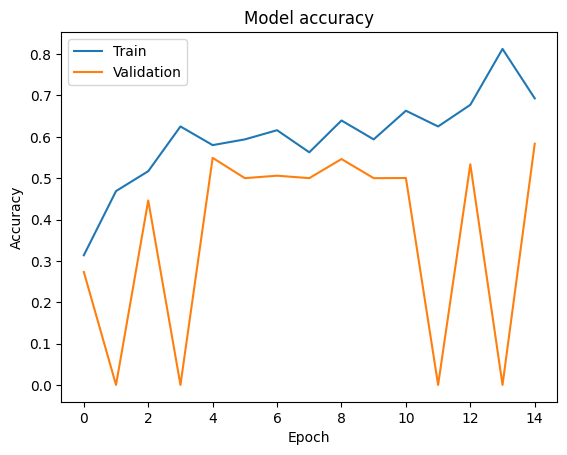

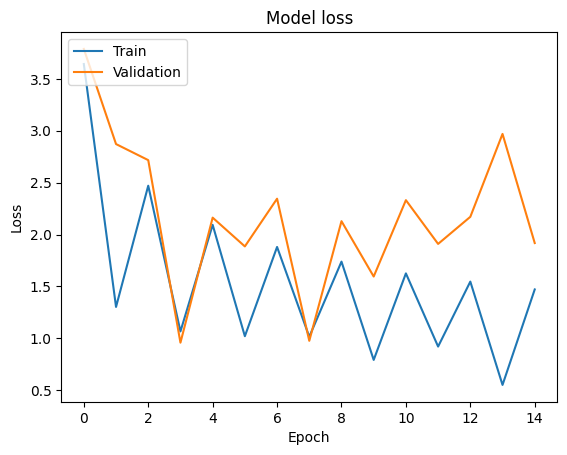

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
